In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [10]:
# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Add cluster labels to DataFrame
df['Cluster'] = kmeans.labels_

# Compare the true species label with the clustering result
species = pd.Categorical.from_codes(iris.target, iris.target_names)
comparison = pd.crosstab(species, df['Cluster'])

# Show cluster centers (means)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns[:-1])

# Output results
print("Cluster centers:\n", centers)
print("\nCluster sizes:", pd.Series(kmeans.labels_).value_counts().sort_index().to_list())
print("\nComparison of actual species vs cluster labels:\n")
print(comparison)

Cluster centers:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           6.853846          3.076923           5.715385          2.053846
1           5.006000          3.428000           1.462000          0.246000
2           5.883607          2.740984           4.388525          1.434426

Cluster sizes: [39, 50, 61]

Comparison of actual species vs cluster labels:

Cluster      0   1   2
row_0                 
setosa       0  50   0
versicolor   3   0  47
virginica   36   0  14


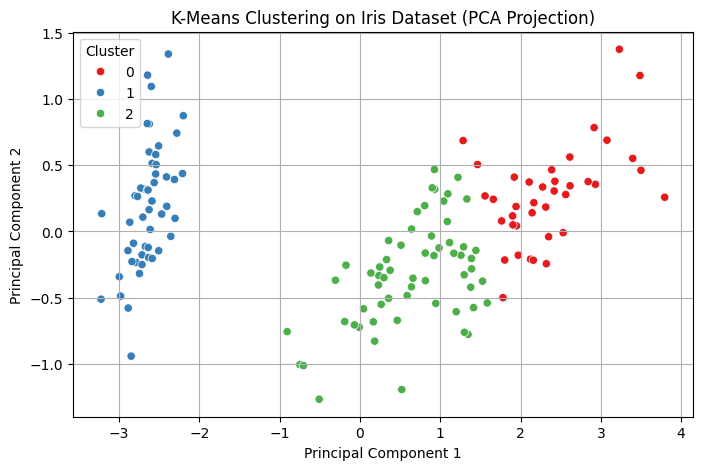

In [11]:
# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.iloc[:, :-1])
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

# Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=df)
plt.title("K-Means Clustering on Iris Dataset (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
